<a href="https://colab.research.google.com/github/praveenprabharavindran/MachineLearning/blob/main/ANN_Handwritten_Digits/ANN_Handwritten_Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Load the dataset

## Import the mnist dataset

In [1]:
# Import the mnist dataset
from tensorflow.keras.datasets import mnist

## Split into Train and Test

In [2]:
# Split into Train and test
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


## Inspect the data

In [3]:
# Inspect the data
print('Train labels y_train[:5]',y_train[:5])
print('Test labels y_train[:5]',y_test[:5])

print('Shape of x_train',x_train.shape)
print('Shape of y_train',y_train.shape)

Train labels y_train[:5] [5 0 4 1 9]
Test labels y_train[:5] [7 2 1 0 4]
Shape of x_train (60000, 28, 28)
Shape of y_train (60000,)


## Visualize the data

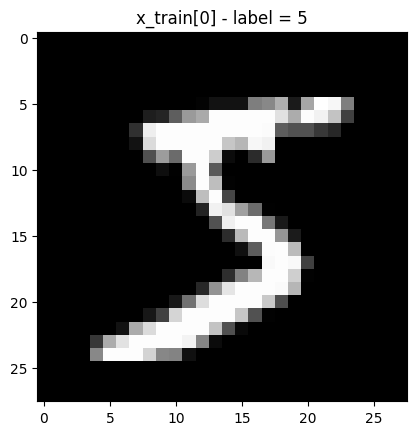

In [4]:
import matplotlib.pyplot as plt
plt.title('x_train[0] - label = ' + str(y_train[0]))
plt.imshow(x_train[0],cmap='gray')

# 2. Preprocess the dataset

## Normalize the pixel value in training and test data

The MNIST dataset consists of grayscale images where each pixel's value ranges from 0 to 255, with 0 being completely black and 255 being completely white. Normalizing the pixel values by dividing them by 255.0 scales all the pixel values to the range of 0 to 1. This is important for several reasons:

* Numerical Stability: Machine learning models, particularly deep neural networks, tend to perform better when input features are within a similar numerical range. Normalizing helps in achieving numerical stability during training.

* Faster Convergence: Normalized inputs can lead to faster convergence during the training of neural networks. It can help in gradient descent-based optimization algorithms to find the optimal weights and biases more efficiently.

* Regularization: Normalization can act as a form of regularization, making the model less prone to overfitting by preventing large input values from dominating the learning process.

* Compatibility with Activation Functions: Some activation functions (like the sigmoid and tanh functions) perform better when inputs are within a specific range, typically -1 to 1. Normalization helps to bring the data within these ranges.

In [5]:
x_train=x_train/255.0
x_test=x_test/255.0

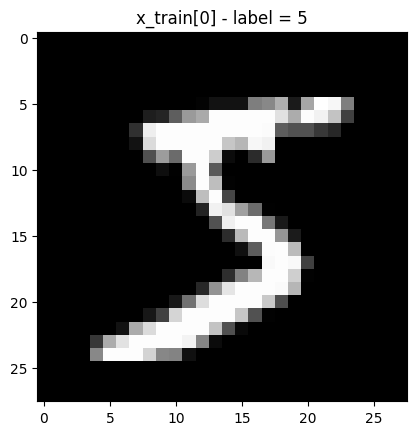

In [6]:
# plot and inspect a sample image from training data after normalization
plt.title('x_train[0] - label = ' + str(y_train[0]))
plt.imshow(x_train[0],cmap='gray')

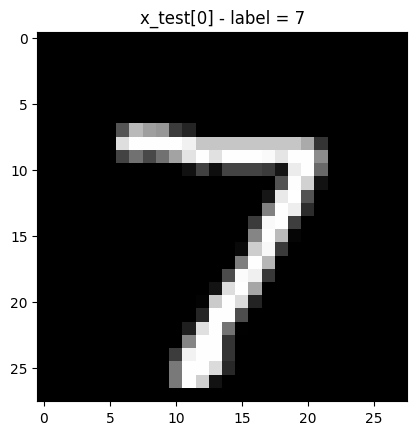

In [7]:
# plplot and inspect a sample image from test data after normalization
plt.title('x_test[0] - label = ' + str(y_test[0]))
plt.imshow(x_test[0],cmap='gray')

# 3. Create an Artificial Neural Network(ANN) using Keras & tensorflow

In [8]:
# Import the necessary classes from keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

## Create Architecture

In [9]:
# define the model
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='sigmoid',name='dense-128-relu'))
model.add(Dense(10,activation='softmax',name='dense-10-softmax'))

# print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense-128-relu (Dense)      (None, 128)               100480    
                                                                 
 dense-10-softmax (Dense)    (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Compile the model

In [10]:
# compile the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [11]:
# define batch size and epochs
batch_size=128
epochs=10

## Fit/train the model

In [12]:
history=model.fit(x_train,y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test,y_test))

Epoch 1/10
469/469 [==============================] - 8s 11ms/step - loss: 0.6154 - accuracy: 0.8505 - val_loss: 0.3184 - val_accuracy: 0.9123
Epoch 2/10
469/469 [==============================] - 5s 11ms/step - loss: 0.2789 - accuracy: 0.9218 - val_loss: 0.2416 - val_accuracy: 0.9306
Epoch 3/10
469/469 [==============================] - 5s 10ms/step - loss: 0.2222 - accuracy: 0.9371 - val_loss: 0.2015 - val_accuracy: 0.9418
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1854 - accuracy: 0.9474 - val_loss: 0.1751 - val_accuracy: 0.9489
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1589 - accuracy: 0.9548 - val_loss: 0.1533 - val_accuracy: 0.9532
Epoch 6/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1376 - accuracy: 0.9612 - val_loss: 0.1351 - val_accuracy: 0.9595
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1211 - accuracy: 0.9655 - val_loss: 0.1262 - val_accuracy: 0.9621
Epo

# 4. Evaluate the results

## Evaluate the model on test data
* evaluate the model on test data
* observe the model loss an accuracy

In [40]:
# See Test score
print('Test score:')
test_score=model.evaluate(x_test,y_test)
print('Test loss:' +str(test_score[0]) + '; Test accuracy: ' + str(test_score[1]) )

Test score:
313/313 [==============================] - 1s 3ms/step - loss: 0.1016 - accuracy: 0.9700
Test loss:0.10158491879701614; Test accuracy: 0.9700000286102295


## Evaluate the model on training data
 * See how well the model has learned the training data

In [41]:
# See Training score
print('Training score:')
train_score=model.evaluate(x_train,y_train)
print('Training loss:' +str(train_score[0]) + '; Training accuracy: ' + str(train_score[1]) )


Training score:
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0769 - accuracy: 0.9796
Training loss:0.07687412947416306; Training accuracy: 0.9795833230018616


## Plot the accuracy of the model on training vs test data

<function matplotlib.pyplot.show(close=None, block=None)>

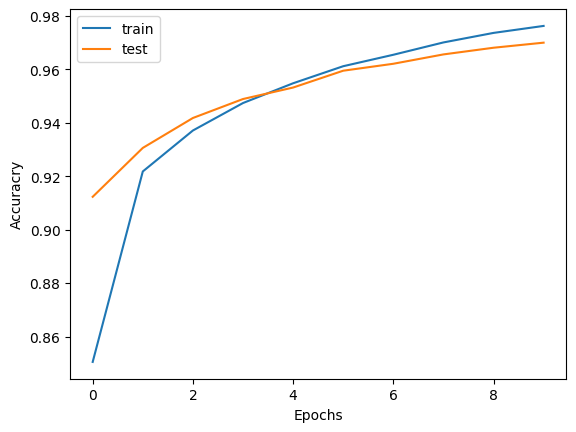

In [15]:
# plot the accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracry')
plt.legend(['train','test'])
plt.show

## Plot the loss of the model on training vs test data

<function matplotlib.pyplot.show(close=None, block=None)>

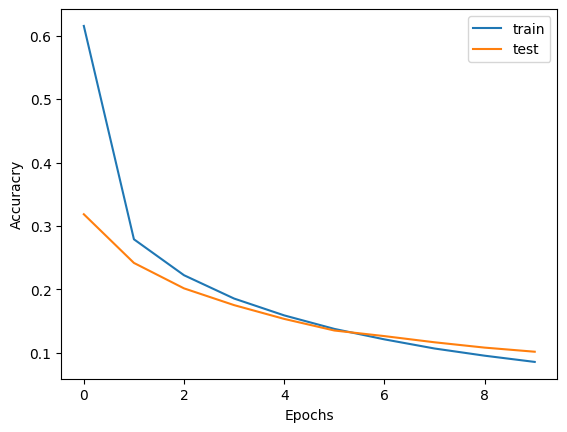

In [16]:
# plot the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Accuracry')
plt.legend(['train','test'])
plt.show

# 5. Use the model to predict/classify the test input data

In [78]:
# classify test input
y_pred=model.predict(x_test)
# print shape of predictions result
print('Shape of y_pred',y_pred.shape)

# print a sample element from y_pred
# It should represent a probability distribution with ten values, each corresponding to one of the digits/classes from 0 to 9.
print("Sample element, 'y_pred[0]':\n",y_pred[0])

313/313 [==============================] - 1s 2ms/step
Shape of y_pred (10000, 10)
Sample element, 'y_pred[0]':
 [1.5034605e-05 7.0375683e-07 7.8277022e-05 1.4421829e-03 2.7538181e-07
 1.3684407e-04 4.1788049e-09 9.9821532e-01 1.1376229e-05 9.9918005e-05]


## 6. Decode labels
 * Transform the predicted probability distribution into its corresponding class labels.

In [79]:
import numpy as np
y_pred=np.argmax(y_pred,axis=1)
print("Inspect a few labels post decoding by printing, 'y_pred[:5]':\n",y_pred[:5])
print("Inspect the corresponding labels from y_test, 'y_test[:5]':\n",test_label[:5])

Inspect a few labels post decoding by printing, 'y_pred[:5]':
 [7 2 1 0 4]
Inspect the corresponding labels from y_test, 'y_test[:5]':
 [7 2 1 0 4]


## Plot confusion matrix

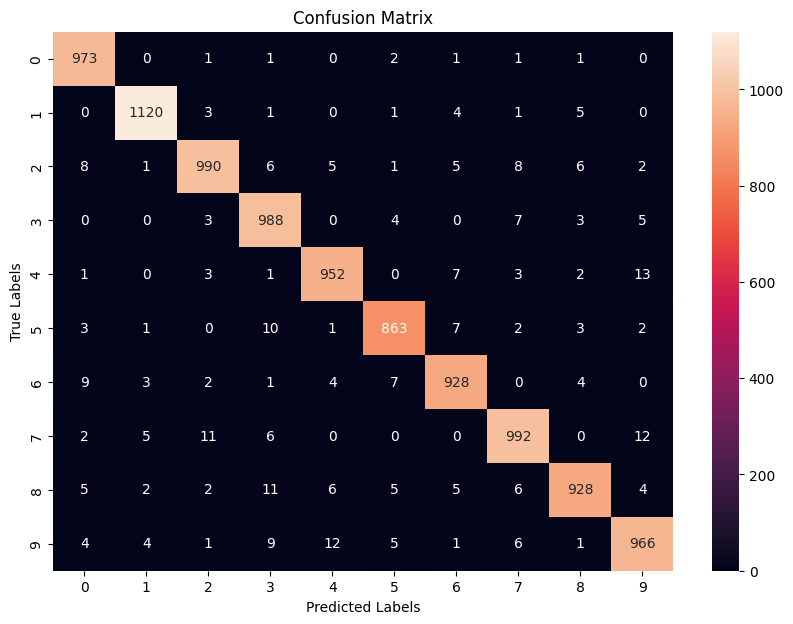

In [84]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(true_labels, predicted_labels):
    # Compute the confusion matrix
    matrix = confusion_matrix(true_labels, predicted_labels)

    # Plot the confusion matrix using a heatmap
    plt.figure(figsize=(10, 7))
    sns.heatmap(matrix, annot=True, fmt='d')
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()

# Call the function to plot the confusion matrix
plot_confusion_matrix(y_test, y_pred)


# 7. Save the model to disk

In [27]:
# save model
#model.save("ANN_Handwritten_model.h5")